In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # "Times", "Palatino", "New Century Schoolbook", "Bookman", 
    })
import seaborn as sn
from  matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
my_cmap_r=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256) 
import matplotlib.ticker as ticker

In [23]:
fs = 20

# Sinc function and hyperparameters

## Tuning with a validation est

In [10]:
# results = pd.read_csv("Data/sinc_results.csv")  # validation set
results = pd.read_csv("Data/sinc_results_cv.csv")  # cross validation
gam_values = results["Gamma"].unique()
sig2_values = results["Sig2"].unique()
mse_values = results["MSE"].values
mse_values = mse_values.reshape((len(gam_values), len(sig2_values)))
results

Gamma     Sig2       MSE
0        10     0.01  0.011455
1        10     0.10  0.011517
2        10     1.00  0.036478
3        10    10.00  0.113375
4        10   100.00  0.134849
5        10  1000.00  0.141564
6       100     0.01  0.011514
7       100     0.10  0.011376
8       100     1.00  0.018000
9       100    10.00  0.108368
10      100   100.00  0.118210
11      100  1000.00  0.140992
12     1000     0.01  0.011612
13     1000     0.10  0.011725
14     1000     1.00  0.014143
15     1000    10.00  0.087663
16     1000   100.00  0.114525
17     1000  1000.00  0.135073
18    10000     0.01  0.012015
19    10000     0.10  0.011300
20    10000     1.00  0.011334
21    10000    10.00  0.068549
22    10000   100.00  0.115288
23    10000  1000.00  0.118918
24   100000     0.01  0.012107
25   100000     0.10  0.011380
26   100000     1.00  0.011300
27   100000    10.00  0.068204
28   100000   100.00  0.115959
29   100000  1000.00  0.115372
30  1000000     0.01  0.012195
31  1000000     0.10  0.011864
32  1000000     1.00  0.011311
33  1000000    10.00  0.062312
34  1000000   100.00  0.109406
35  1000000  1000.00  0.115282

In [11]:
# Now turn into matrix
matrix = pd.DataFrame(mse_values)
matrix.set_index(gam_values, inplace = True)
matrix.columns = sig2_values
matrix

0.01      0.10      1.00      10.00     100.00    1000.00
10       0.011455  0.011517  0.036478  0.113375  0.134849  0.141564
100      0.011514  0.011376  0.018000  0.108368  0.118210  0.140992
1000     0.011612  0.011725  0.014143  0.087663  0.114525  0.135073
10000    0.012015  0.011300  0.011334  0.068549  0.115288  0.118918
100000   0.012107  0.011380  0.011300  0.068204  0.115959  0.115372
1000000  0.012195  0.011864  0.011311  0.062312  0.109406  0.115282

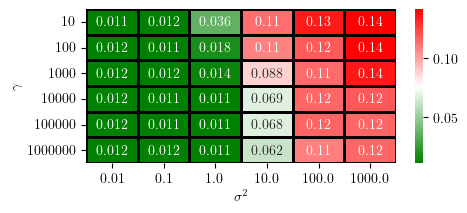

In [12]:
plt.figure(figsize=(5,2))
sn.heatmap(matrix, annot=True, cmap=my_cmap_r, linewidths=1, linecolor='black')
# plt.title("Random split")
plt.xlabel(r"$\sigma^2$")
plt.ylabel(r"$\gamma$")

plt.savefig("Plots/sinc_validation_tuning.pdf", bbox_inches='tight')
plt.show()

## Tune with $\texttt{tunelssvm}$

Note: accidentally swapped gamma and algorithm!

In [13]:
results = pd.read_csv("Data/sinc_tuning_results.csv")
gridsearch = results[results["Algorithm"] == "gridsearch"]
simplex = results[results["Algorithm"] == "simplex"]
gridsearch

Algorithm         Gamma      Sig2       MSE
0   gridsearch     14.607837  0.312826  0.010769
1   gridsearch  41184.724480  0.897818  0.010654
2   gridsearch      9.789727  0.252032  0.010717
3   gridsearch   6843.717893  0.751831  0.010700
4   gridsearch     26.388764  0.359117  0.010787
..         ...           ...       ...       ...
95  gridsearch     21.887567  0.340166  0.010773
96  gridsearch  12551.668821  0.853939  0.010732
97  gridsearch     19.833815  0.322942  0.010754
98  gridsearch     10.630273  0.239581  0.010701
99  gridsearch  11197.769394  0.809425  0.010701

[100 rows x 4 columns]

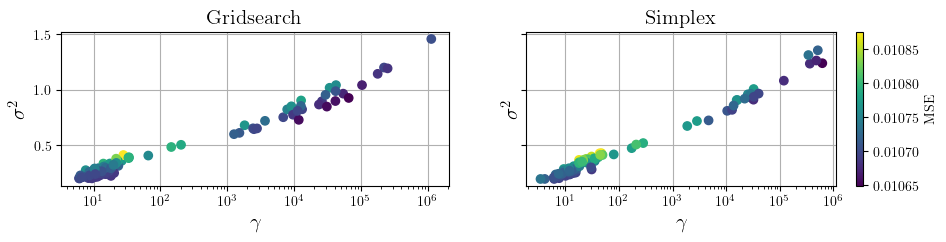

In [14]:
plt.subplots(nrows = 1, ncols = 2, figsize=(11,2), sharey=True)

df_list = [gridsearch, simplex]
title_list = ["Gridsearch", "Simplex"]

for i, df in enumerate(df_list):
    plt.subplot(1,2,i+1)
    gam_values = df["Gamma"].values
    sig2_values = df["Sig2"].values
    mse_values = df["MSE"].values
    plt.scatter(gam_values, sig2_values, c = mse_values, zorder=100)
    plt.title(title_list[i], fontsize=fs)
    plt.xlabel(r"$\gamma$", fontsize=fs)
    plt.ylabel(r"$\sigma^2$", fontsize=fs)
    plt.xscale('log')
    plt.grid()
    
cbar = plt.colorbar()
cbar.set_label("MSE")

plt.savefig("Plots/sinc_tunelssvm.pdf", bbox_inches = 'tight')
plt.show()

In [15]:
print("The average (gam, s2) for gridsearch is: (%0.3f, %0.3f)" % (np.mean(gridsearch["Gamma"]), np.mean(gridsearch["Sig2"])))
print("The average (gam, s2) for simplex is: (%0.3f, %0.3f)" % (np.mean(simplex["Gamma"]), np.mean(simplex["Sig2"])))
print("The average MSE for gridsearch was: %0.5f pm %0.5f" % (np.mean(gridsearch["MSE"]), np.std(gridsearch["MSE"])))
print("The average MSE for simplex was: %0.5f pm %0.5f" % (np.mean(simplex["MSE"]), np.std(simplex["MSE"])))
print("The best MSE for gridsearch was: %0.5f " % (np.min(gridsearch["MSE"])))
print("The best MSE for simplex was: %0.5f " % (np.min(simplex["MSE"])))

The average (gam, s2) for gridsearch is: (23633.262, 0.468)
The average (gam, s2) for simplex is: (27951.014, 0.456)
The average MSE for gridsearch was: 0.01073 pm 0.00005
The average MSE for simplex was: 0.01074 pm 0.00005
The best MSE for gridsearch was: 0.01064 
The best MSE for simplex was: 0.01065 


## Adding Bayesian optimization as well

In [16]:
bayes_results = pd.read_csv("Data/sinc_Bayes_results.csv")
gam_values = bayes_results["Gamma"].unique()
sig2_values = bayes_results["Sig2"].unique()
mse_values = bayes_results["MSE"].values
reps_values = bayes_results["Nb repetitions"].values
bayes_results

Gamma      Sig2       MSE  Nb repetitions
0  0.354869  0.217380  0.643686               1
1  0.088306  0.217381  0.012881               2
2  0.088306  0.217381  0.025573               3
3  0.088306  0.217381  0.025573               4
4  0.088306  0.217381  0.025573               5

# ARD by crossvalidation

In [17]:
df = pd.read_csv("Data/sinc_ARD_CV.csv").sort_values(by = ["MSE"])
subsets = df["Subset"].values
mse = df["MSE"].values

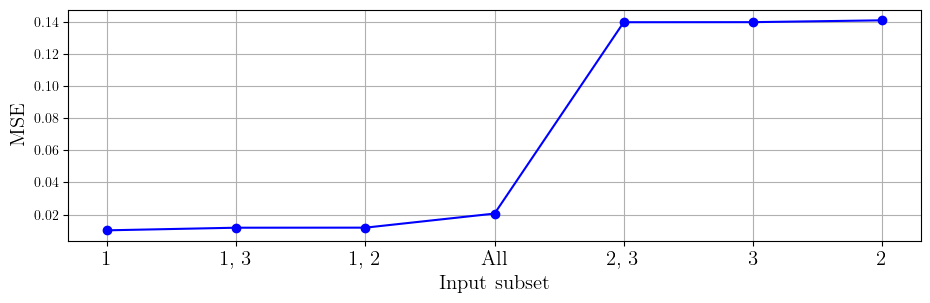

In [18]:
plt.figure(figsize=(11,3))
plt.plot(mse, '-o', color="blue")
plt.xticks([i for i in range(len(mse))], labels = subsets, fontsize = fs)
plt.ylabel("MSE", fontsize=fs)
plt.xlabel("Input subset", fontsize=fs)
plt.grid()
plt.savefig("Plots/sinc_ARD_by_crossvalidation.pdf", bbox_inches = 'tight')
plt.show()

# Logmap

In [19]:
df = pd.read_csv("Data/logmap_order_results.csv")
order = df["Order"].values
mse = df["MSE"].values

In [20]:
best_index = np.argmin(mse)
best_order = order[best_index]
print(f"Best order determined by CV was: {best_order}")

Best order determined by CV was: 4


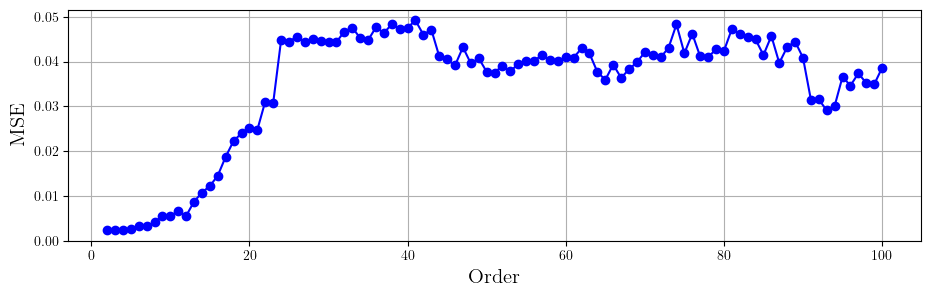

In [21]:
plt.figure(figsize=(11,3))
plt.plot(order, mse, '-o', color="blue")
plt.ylabel("MSE", fontsize=fs)
plt.xlabel("Order", fontsize=fs)
plt.grid()
# plt.yscale('log')
plt.savefig("Plots/logmap_order_CV.pdf", bbox_inches = 'tight')
plt.show()

## Plot the data and predictions

In [22]:
logmap_train = np.loadtxt("Data/logmap_train.txt")
logmap_test = np.loadtxt("Data/logmap_test.txt")
logmap_pred = np.loadtxt("Data/logmap_pred.txt")

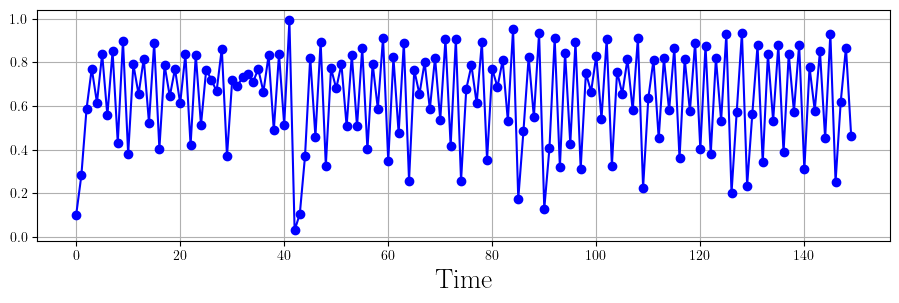

In [24]:
plt.figure(figsize=(11,3))
plt.plot(logmap_train, '-o', color="blue")
plt.grid()
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/logmap_train.pdf", bbox_inches = 'tight')
plt.show()

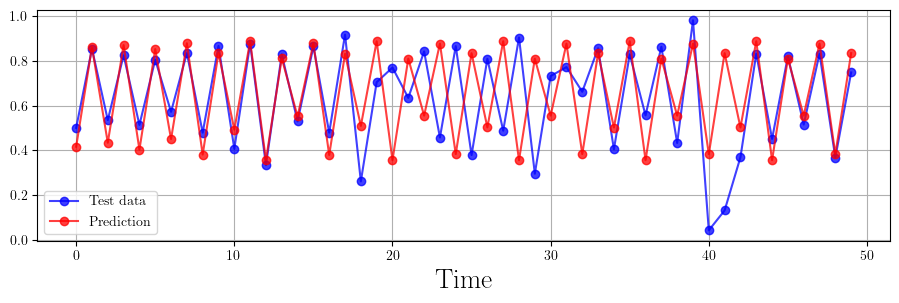

In [25]:
plt.figure(figsize=(11,3))
alph = 0.75
plt.plot(logmap_test, '-o', color="blue", label = "Test data", alpha=alph)
plt.plot(logmap_pred, '-o', color="red", label = "Prediction", alpha=alph)
plt.grid()
plt.legend()
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/logmap_prediction.pdf", bbox_inches = 'tight')
plt.show()

# Santa Fe

In [26]:
df = pd.read_csv("Data/santafe_order_results_N.csv")
order = df["Order"].values
mse = df["MSE"].values

In [27]:
best_index = np.argmin(mse)
best_order = order[best_index]
print(f"Best order determined by CV was: {best_order}")

Best order determined by CV was: 9


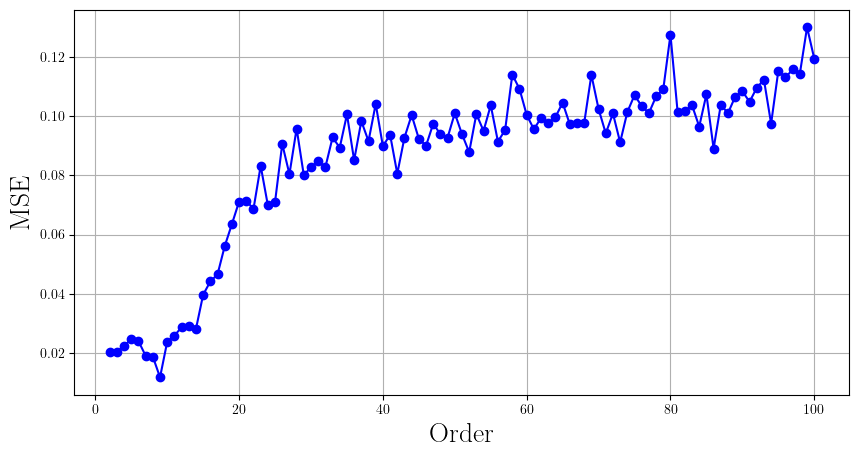

In [28]:
plt.figure(figsize=(10,5))
plt.plot(order, mse, '-o', color="blue")
plt.ylabel("MSE", fontsize=fs)
plt.xlabel("Order", fontsize=fs)
plt.grid()
# plt.yscale('log')
plt.savefig("Plots/santafe_order_CV.pdf", bbox_inches = 'tight')
plt.show()

## Plot the data and predictions

In [29]:
santafe_train = np.loadtxt("Data/santafe_train.txt")
santafe_test = np.loadtxt("Data/santafe_test.txt")
santafe_pred_9 = np.loadtxt("Data/santafe_pred_9.txt")
santafe_pred_100 = np.loadtxt("Data/santafe_pred_100.txt")
santafe_pred_50 = np.loadtxt("Data/santafe_pred_50.txt")

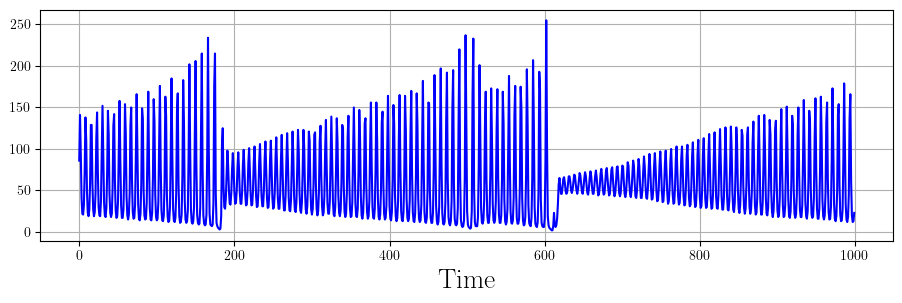

In [30]:
plt.figure(figsize=(11,3))
plt.plot(santafe_train, '-', color="blue")
plt.grid()
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/santafe_train.pdf", bbox_inches = 'tight')
plt.show()

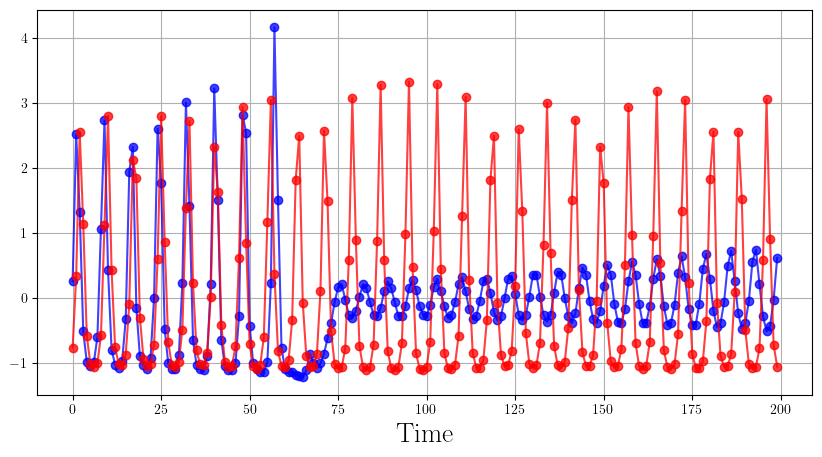

In [31]:
plt.figure(figsize=(10,5))
alph = 0.75
plt.plot(santafe_test, '-o', color="blue", label = "Test data", alpha=alph)
plt.plot(santafe_pred_9, '-o', color="red", label = "Prediction", alpha=alph)
plt.grid()
# plt.legend()
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/santafe_prediction_9.pdf", bbox_inches = 'tight')
plt.show()

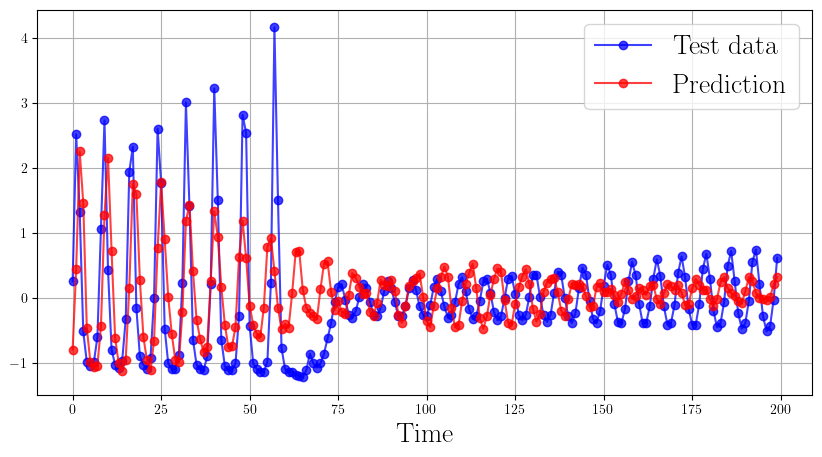

In [35]:
plt.figure(figsize=(10,5))
alph = 0.75
plt.plot(santafe_test, '-o', color="blue", label = "Test data", alpha=alph)
plt.plot(santafe_pred_100, '-o', color="red", label = "Prediction", alpha=alph)
plt.grid()
plt.legend(fontsize=fs)
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/santafe_prediction_100.pdf", bbox_inches = 'tight')
plt.show()

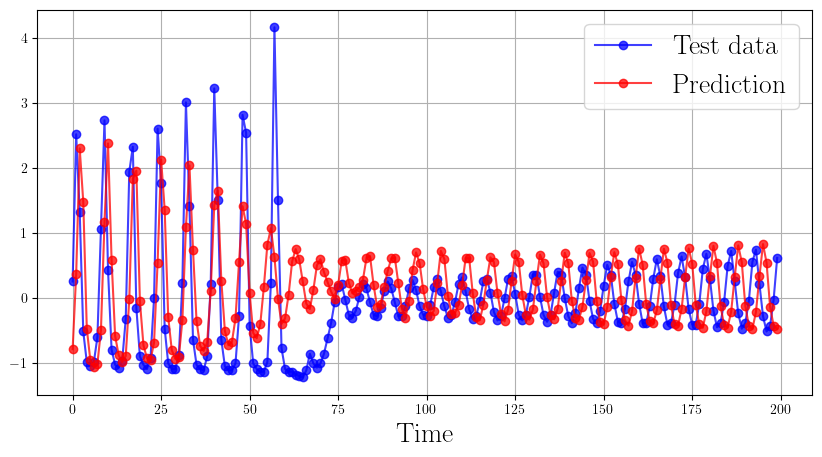

In [36]:
plt.figure(figsize=(10,5))
alph = 0.75
plt.plot(santafe_test, '-o', color="blue", label = "Test data", alpha=alph)
plt.plot(santafe_pred_50, '-o', color="red", label = "Prediction", alpha=alph)
plt.grid()
plt.legend(fontsize=fs)
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/santafe_prediction_50.pdf", bbox_inches = 'tight')
plt.show()